## Attempting reference comparison

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 

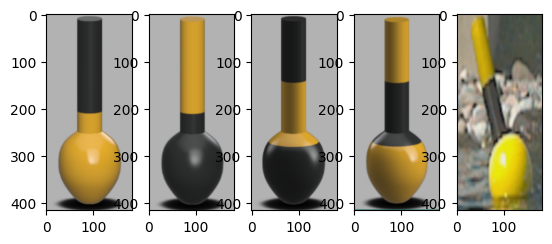

In [5]:
north = cv2.imread('../data/ground_truth/north.png')
north = cv2.cvtColor(north, cv2.COLOR_BGR2RGB)
ground_truth_res = (north.shape[1], north.shape[0])

south = cv2.imread('../data/ground_truth/south.png')
south = cv2.cvtColor(south, cv2.COLOR_BGR2RGB)
south = cv2.resize(south, ground_truth_res)

east = cv2.imread('../data/ground_truth/east.png')
east = cv2.cvtColor(east, cv2.COLOR_BGR2RGB)
east = cv2.resize(east, ground_truth_res)

west = cv2.imread('../data/ground_truth/west.png')
west = cv2.cvtColor(west, cv2.COLOR_BGR2RGB)
west = cv2.resize(west, ground_truth_res)


img = cv2.imread('../data/cardinal_buoy.png')
buoy = img[530+10:650-20, 950+1:1030]
buoy = cv2.cvtColor(buoy, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 5)
axs[0].imshow(north)
axs[1].imshow(south)
axs[2].imshow(east)
axs[3].imshow(west)
buoy = cv2.resize(buoy, ground_truth_res)
axs[4].imshow(buoy)



Text(0.5, 1.0, 'detection')

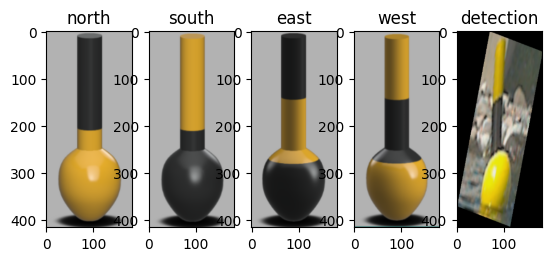

In [6]:
from scipy import ndimage
buoy_angle = 15
buoy = ndimage.rotate(buoy, -buoy_angle)
fig, axs = plt.subplots(1, 5)
axs[0].imshow(north)
axs[0].set_title("north")

axs[1].imshow(south)
axs[1].set_title("south")

axs[2].imshow(east)
axs[2].set_title("east")

axs[3].imshow(west)
axs[3].set_title("west")
buoy = cv2.resize(buoy, ground_truth_res)
axs[4].imshow(buoy)
axs[4].set_title("detection")


In [7]:
names = ("north", "south", "east", "west")
buoys = (north, south, east, west)
costs = []
lowest_cost = np.inf

for name, buoy_ref in zip(names, buoys):
    cost = np.linalg.norm(buoy_ref-buoy)
    costs.append(cost)
    if cost < lowest_cost:
        buoy_prediction = name
        lowest_cost = cost

costs = costs/max(costs)
print(buoy_prediction, lowest_cost)


east 71069.07318236252


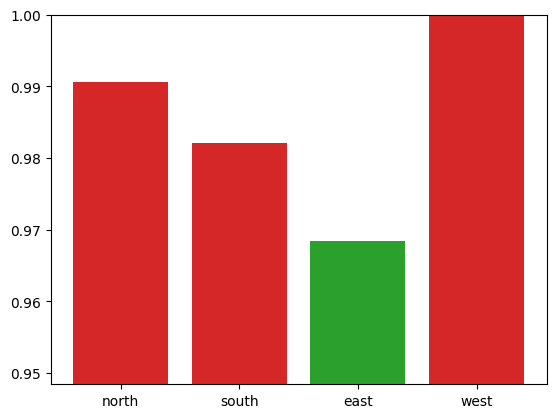

In [8]:
fig, ax = plt.subplots()
bar_colors = ['tab:red', 'tab:red', 'tab:red', 'tab:red']
bar_colors[names.index(buoy_prediction)] = 'tab:green'

ax.bar(names, costs, color=bar_colors)
ax.set_ylim(min(costs)-0.02, 1.0)
plt.show()